### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.stats.diagnostic import acorr_ljungbox

from statsmodels.tsa.statespace.sarimax import SARIMAX

### Data

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
display('Sample records from the train dataset:', train.head())
display('Sample records from the test dataset:', test.head())

'Sample records from the train dataset:'

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


'Sample records from the test dataset:'

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


### Summary Statistics

In [3]:
display('Summary stats for train dataset:', train.describe(include = 'all').T)
display('Summary stats for test dataset:', test.describe(include = 'all').T)

'Summary stats for train dataset:'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,913000,1826,2016-05-04,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store,913000,NaN,NaN,NaN,5.5,2.87228,1,3,5.5,8,10
item,913000,NaN,NaN,NaN,25.5,14.4309,1,13,25.5,38,50
sales,913000,NaN,NaN,NaN,52.2503,28.8011,0,30,47,70,231


'Summary stats for test dataset:'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,45000,NaN,NaN,NaN,22499.5,12990.5,0,11249.8,22499.5,33749.2,44999
date,45000,90,2018-02-18,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store,45000,NaN,NaN,NaN,5.5,2.87231,1,3,5.5,8,10
item,45000,NaN,NaN,NaN,25.5,14.431,1,13,25.5,38,50


In [4]:
display('Count of missing data in train dataset:\n', train.isna().sum())
display('Count of missing data in test dataset:\n', test.isna().sum())

'Count of missing data in train dataset:\n'

date     0
store    0
item     0
sales    0
dtype: int64

'Count of missing data in test dataset:\n'

id       0
date     0
store    0
item     0
dtype: int64

In [5]:
display('Cross-tabulating stores and items in the train dataset:', pd.crosstab(train.item, train.store))
display('Cross-tabulating stores and items in the test dataset:', pd.crosstab(test.item, test.store))

'Cross-tabulating stores and items in the train dataset:'

store,1,2,3,4,5,6,7,8,9,10
item,,,,,,,,,,
1,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
2,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
3,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
4,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
5,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
6,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
7,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
8,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
9,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826


'Cross-tabulating stores and items in the test dataset:'

store,1,2,3,4,5,6,7,8,9,10
item,,,,,,,,,,
1,90,90,90,90,90,90,90,90,90,90
2,90,90,90,90,90,90,90,90,90,90
3,90,90,90,90,90,90,90,90,90,90
4,90,90,90,90,90,90,90,90,90,90
5,90,90,90,90,90,90,90,90,90,90
6,90,90,90,90,90,90,90,90,90,90
7,90,90,90,90,90,90,90,90,90,90
8,90,90,90,90,90,90,90,90,90,90
9,90,90,90,90,90,90,90,90,90,90


#### Observations
<ol>
    <li>The <i>train</i> dataset has 913,000 records for 10 stores. For each store there might be upto 50 items sold.
    <li>The <i>test</i> dataset has 45,000 records for 10 stores. For each store there might be upto 50 items sold.
    <li>There is no missing data in either train or test dataset.
    <li>There are the same number of records for every store-item pair in the train (1826 per pair) and test (90 per pair) datasets.
    <li>The data fields must be appropriately typecasted.
    <ul>
        <li>date field to <i>type datetime</i>
        <li>store field to <i>type category</i>
        <li>item field to <i>type category</i>
    </ul>
    
</ol>

#### Typecasting the data fields

In [6]:
train.date = pd.to_datetime(train.date, format = '%Y-%m-%d')
test.date = pd.to_datetime(test.date, format = '%Y-%m-%d')

train.store = train.store.astype('category')
test.store = test.store.astype('category')

train.item = train.item.astype('category')
test.item = test.item.astype('category')

### Frequency Plots for Daily Sales over Time Period

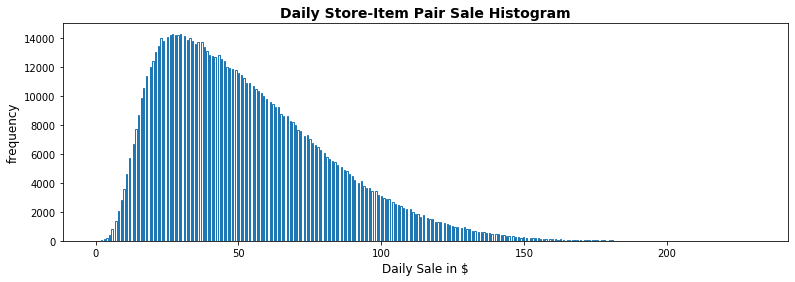

The daily sale across all store-item pairs ranges from 0 to 231.
The mean daily sale for a store-item pair is 52, the median is 47 and the standard deviation is 28.



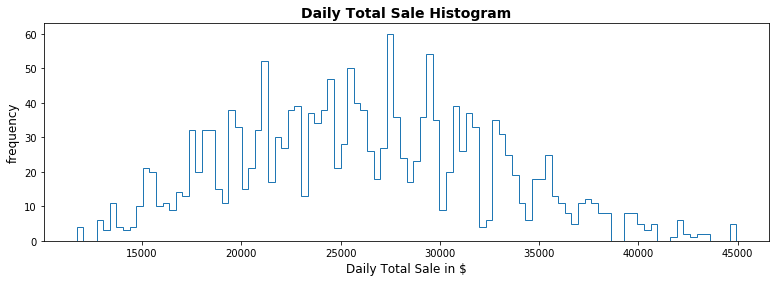

The daily total sale ranges from 11709 to 44936
The mean daily total sale is 26125, the median is 25839 and the standard deviation is 6418.



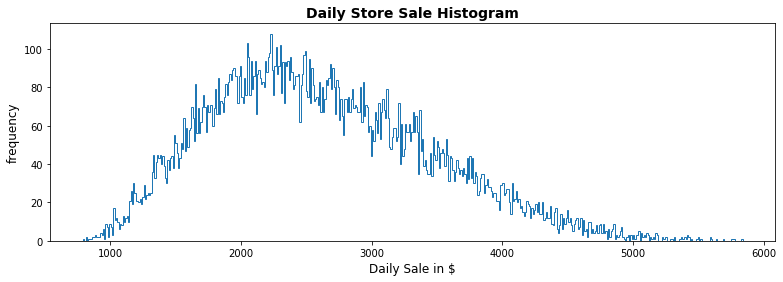

The daily sale in a store ranges from 790 to 5839
The mean daily sale in a store is 2612, the median is 2515 and the standard deviation is 833.



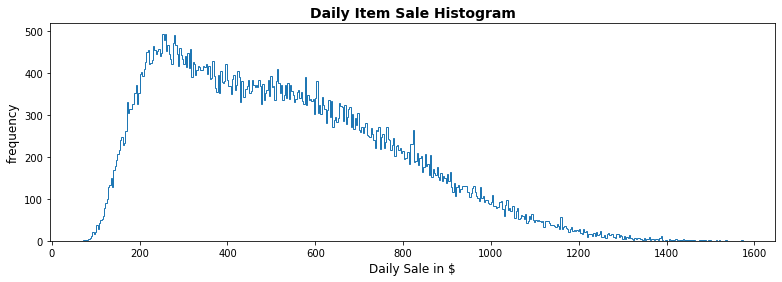

The daily sale of an item ranges from 71 to 1573
The mean daily sale for an item is 522, the median is 489 and the standard deviation is 255.



In [7]:
plt.figure(figsize = (13, 4))
plt.hist(train.sales, histtype = 'step', bins = 500)
plt.xlabel('Daily Sale in $', fontsize = 12)
plt.ylabel('frequency', fontsize = 12)
plt.title('Daily Store-Item Pair Sale Histogram', fontsize = 14, fontweight = 'bold')
plt.show()

print('The daily sale across all store-item pairs ranges from %i to %i.' 
      % (np.min(train.sales), np.max(train.sales)))
print('The mean daily sale for a store-item pair is %i, the median is %i and the standard deviation is %i.\n' 
      % (np.mean(train.sales), np.median(train.sales), np.std(train.sales)))

plt.figure(figsize = (13, 4))

dailysales_all = train.groupby(by = ['date'])['sales'].sum()
plt.hist(dailysales_all, histtype = 'step', bins = 100)
plt.xlabel('Daily Total Sale in $', fontsize = 12)
plt.ylabel('frequency', fontsize = 12)
plt.title('Daily Total Sale Histogram', fontsize = 14, fontweight = 'bold')
plt.show()

print('The daily total sale ranges from %i to %i' % (dailysales_all.min(), dailysales_all.max()))
print('The mean daily total sale is %i, the median is %i and the standard deviation is %.i.\n' 
      % (dailysales_all.mean(), dailysales_all.median(), dailysales_all.std()))

plt.figure(figsize = (13, 4))

dailysales_sto = train.groupby(by = ['store', 'date'])['sales'].sum()
plt.hist(dailysales_sto, histtype = 'step', bins = 500)
plt.xlabel('Daily Sale in $', fontsize = 12)
plt.ylabel('frequency', fontsize = 12)
plt.title('Daily Store Sale Histogram', fontsize = 14, fontweight = 'bold')
plt.show()

print('The daily sale in a store ranges from %i to %i' % (dailysales_sto.min(), dailysales_sto.max()))
print('The mean daily sale in a store is %i, the median is %i and the standard deviation is %.i.\n' 
      % (dailysales_sto.mean(), dailysales_sto.median(), dailysales_sto.std()))

plt.figure(figsize = (13, 4))

dailysales_itm = (train.groupby(by = ['item', 'date'])['sales'].sum())
plt.hist(dailysales_itm, histtype = 'step', bins = 500)
plt.xlabel('Daily Sale in $', fontsize = 12)
plt.ylabel('frequency', fontsize = 12)
plt.title('Daily Item Sale Histogram', fontsize = 14, fontweight = 'bold')
plt.show()

print('The daily sale of an item ranges from %i to %i' % (dailysales_itm.min(), dailysales_itm.max()))
print('The mean daily sale for an item is %i, the median is %i and the standard deviation is %.i.\n' 
      % (dailysales_itm.mean(), dailysales_itm.median(), dailysales_itm.std()))

#### Observations

<ol>
    <li>The per day sales plot for store-item pairs, total sales, stores and items are all right skewed. The per day plot for total sales and stores sales have the least skew and the least relative standard deviation (std. dev/mean).
</ol>

### Timeseries Plots for Daily Sales over Time Period

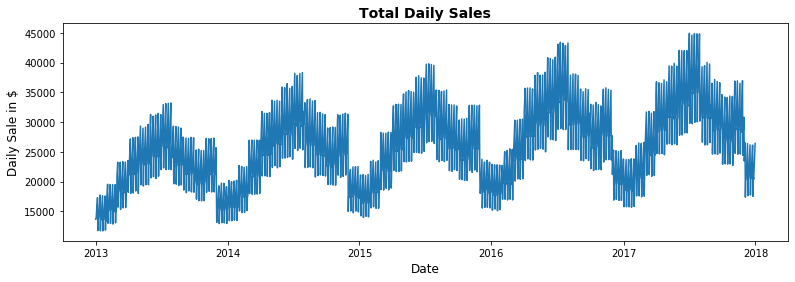

In [8]:
fig, ax = plt.subplots(figsize = (13, 4))

ax.plot(dailysales_all.index, dailysales_all)
ax.set_title('Total Daily Sales', fontdict = {'fontsize' : 14, 'fontweight' : 'bold'})
ax.set_ylabel('Daily Sale in $', fontdict = {'fontsize' : 12})
ax.set_xlabel('Date', fontdict = {'fontsize' : 12})

plt.show()


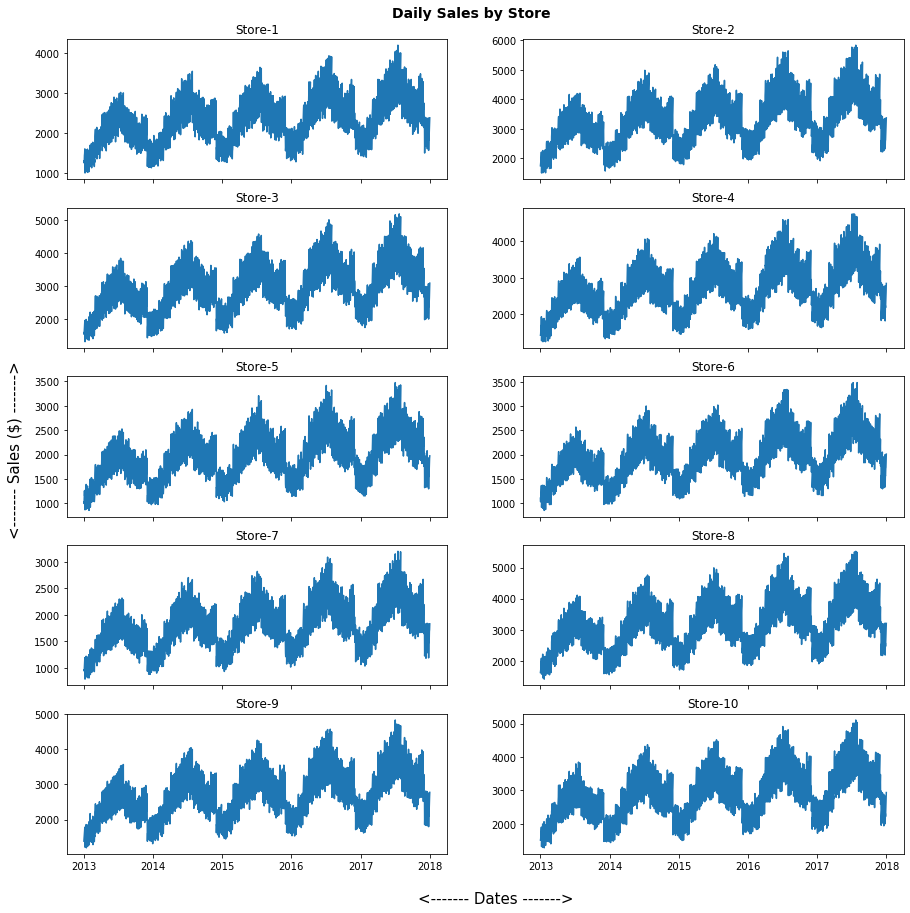

In [9]:
n_stores = len(train.store.unique())

# Setting up parameters for the plot
n_cols = 2
n_rows = np.int(np.ceil(n_stores/n_cols))
store_id = 1

fig, ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (15, 15), sharex = 'col')
plt.suptitle('Daily Sales by Store', x = 0.5, y = 0.91, size = 14, weight = 'bold')
for r in range(n_rows):
    for c in range(n_cols):
        ax[r, c].plot(dailysales_sto[store_id].index, dailysales_sto[store_id])
        ax[r, c].set_title('Store-%i' % store_id, fontdict = {'fontsize' : 12})
        store_id += 1

fig.text(0.07, 0.5, '<------- Sales ($) ------->', rotation = 'vertical', va = 'center', size = 15)
fig.text(0.45, 0.08, '<------- Dates ------->', size = 15)
plt.show()

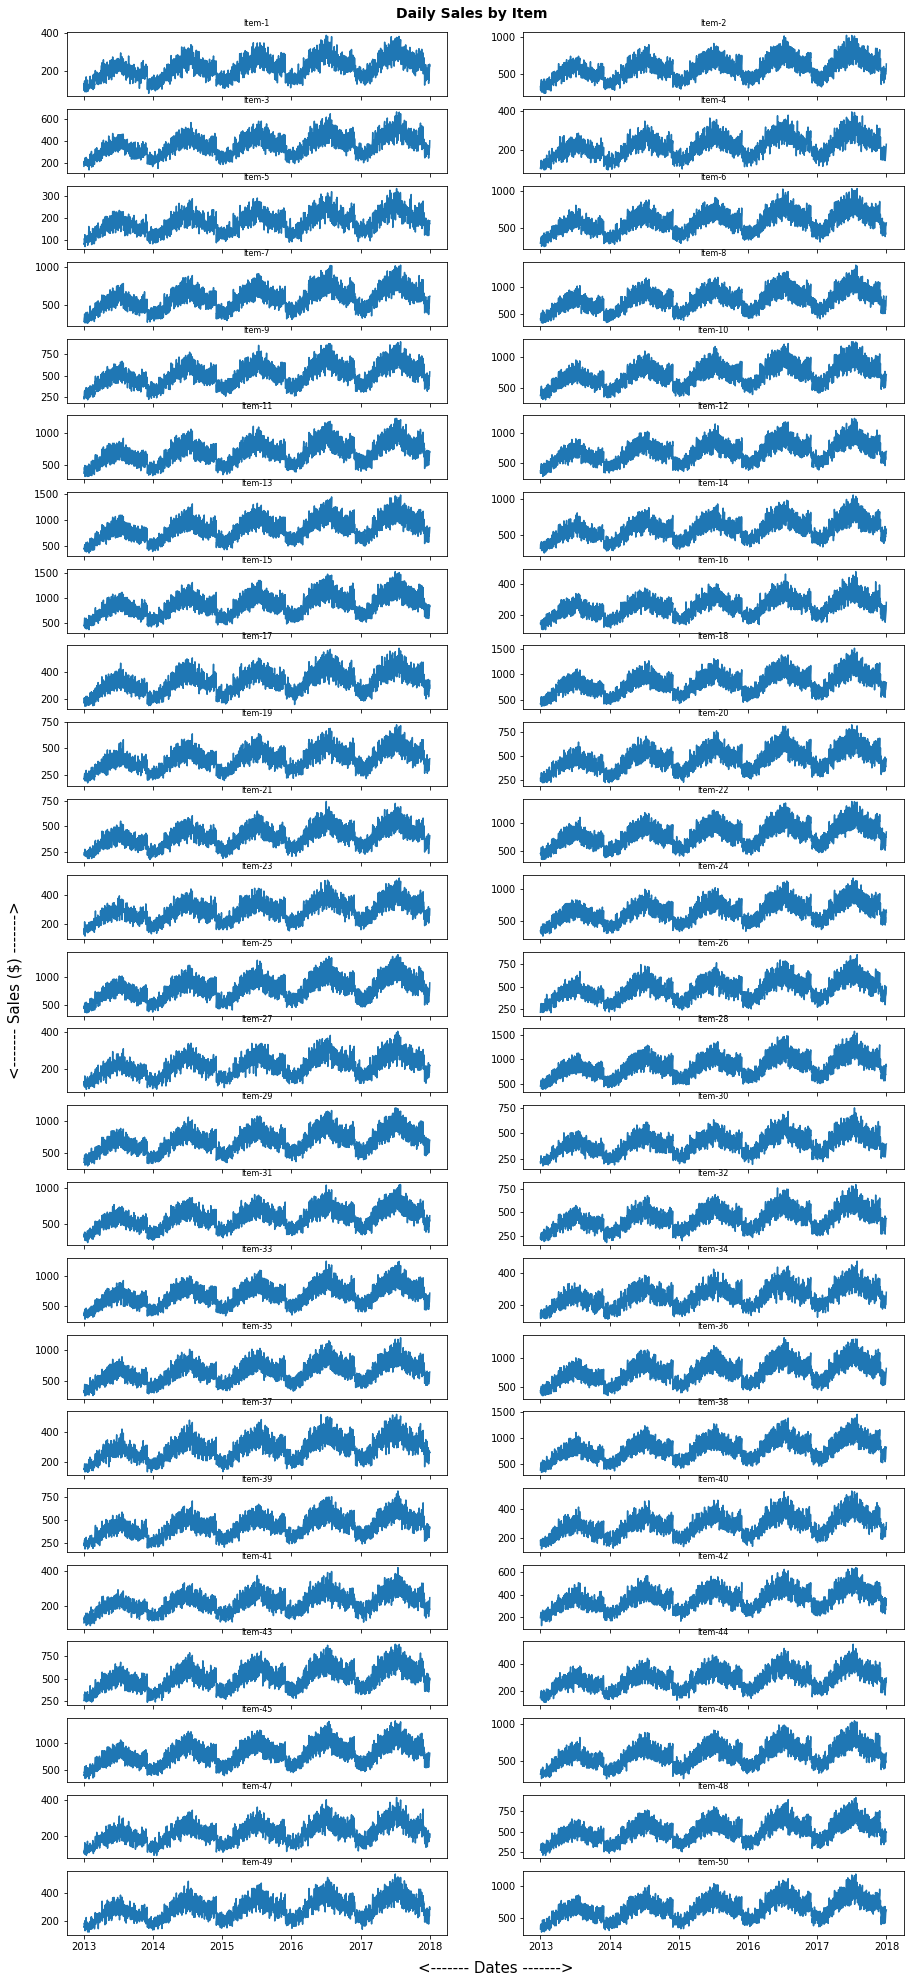

In [10]:
n_items = len(train.item.unique())

# Setting up parameters for the plot
n_cols = 2
n_rows = np.int(np.ceil(n_items/n_cols))
item_id = 1

fig, ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (15, 35), sharex = 'col')
plt.suptitle('Daily Sales by Item', x = 0.5, y = 0.89, size = 14, weight = 'bold')
for r in range(n_rows):
    for c in range(n_cols):
        foo = train.query('item == @item_id').groupby('date')['sales'].sum()
        ax[r, c].plot(dailysales_itm[item_id].index, dailysales_itm[item_id])
        ax[r, c].set_title('Item-%i' % item_id, fontdict = {'fontsize' : 8})
        item_id += 1

fig.text(0.07, 0.5, '<------- Sales ($) ------->', rotation = 'vertical', va = 'center', size = 15)
fig.text(0.45, 0.11, '<------- Dates ------->', size = 15)
plt.show()

#### Observations
<ol>
    <li>Daily sales (combined over all stores) exhibits a specific patterns:
        <ul>
            <li>Within a year, sales are cyclical, increasing month-on-month for about half the year and then decreasing month-on-month for the rest of the year.
            <li>This monthly pattern is repeated every year.
            <li>Year-on-year, the month-over-month sales (same month across different years) show an upward trend.
        </ul>
    <li>Individual store sales exhibit similar pattern for all stores which, in turn, is similar to the overall daily sales pattern.
    <li>Individual item sales exhibit similar pattern for all items which, in turn, is similar to the overall daily sales pattern.
</ol>

#### Exploring Weekly Pattern

<ol>
    <li>We <i>zoom-in</i> on the daily sales plot to better visualize the pattern of daily sales.
    <li>The plots for total daily sales, total daily sales by store and total daily sales by item show similar trend and we make the reasonable assumption that <i>zooming-in</i> only on the total daily sales plot will reveal patterns that are common to all the three plots.
    <li>For each of the 5 years of the timeseries, we visualise the daily sales for every quarter.
</ol>

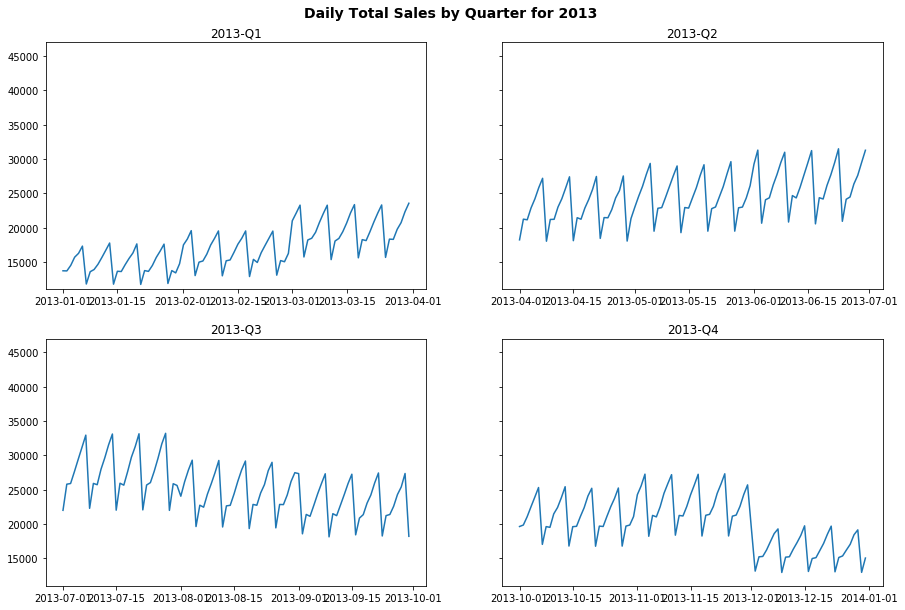

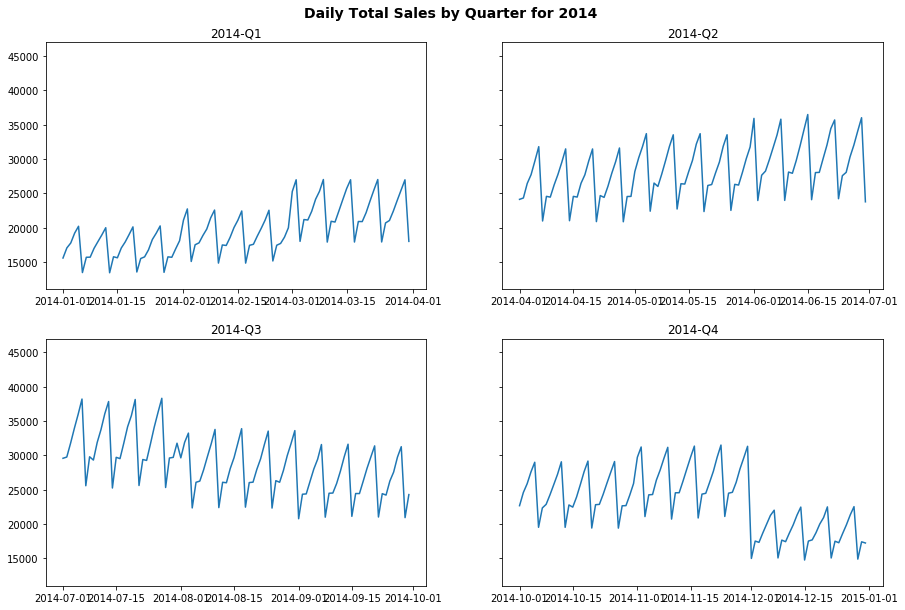

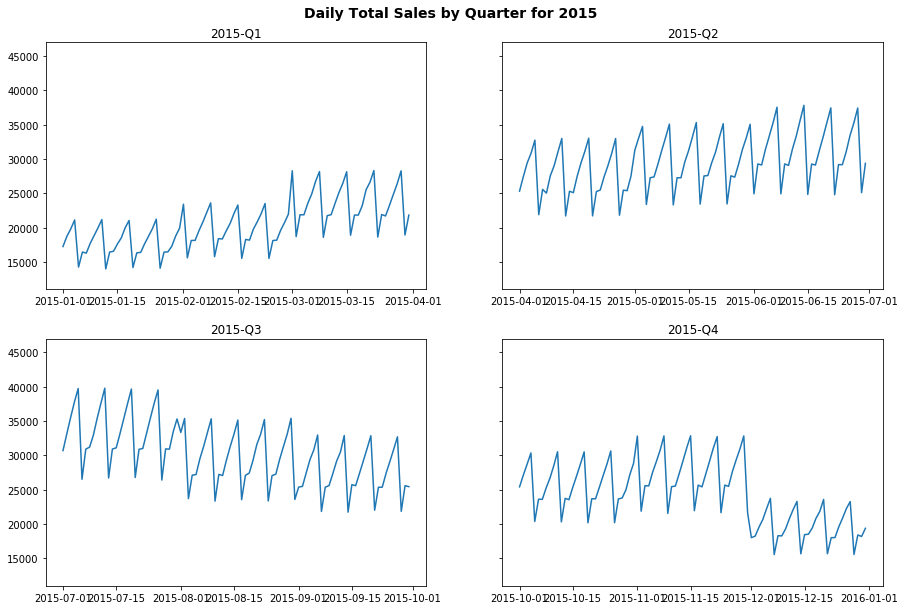

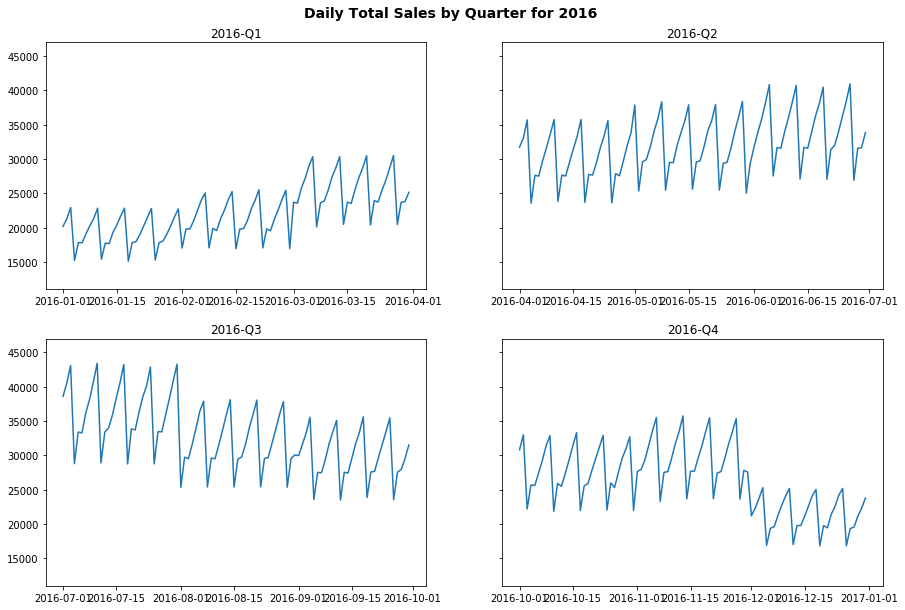

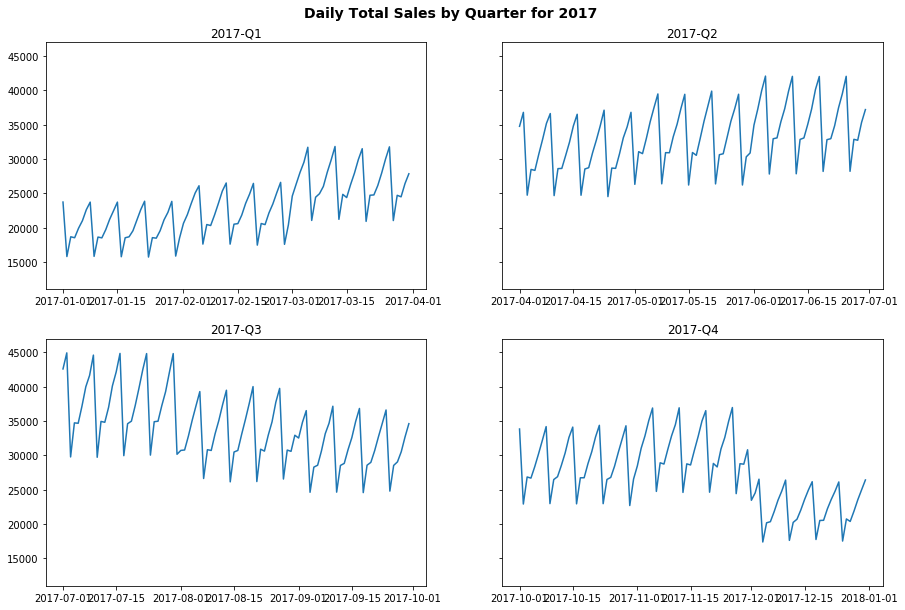

In [11]:
for year in range(2013, 2018):
    fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (15, 10), sharey = 'row', 
                           subplot_kw = {'ylim' : (11000, 47000)})
    plt.suptitle('Daily Total Sales by Quarter for %s' % str(year), 
                 x = 0.5, y = 0.93, fontsize = 14, fontweight = 'bold')
    ax[0,0].plot(dailysales_all[str(year)+'-01-01':str(year)+'-03-31'])
    ax[0,0].set_title('%s-Q1' % str(year))
    ax[0,1].plot(dailysales_all[str(year)+'-04-01':str(year)+'-06-30'])
    ax[0,1].set_title('%s-Q2' % str(year))
    ax[1,0].plot(dailysales_all[str(year)+'-07-01':str(year)+'-09-30'])
    ax[1,0].set_title('%s-Q3' % str(year))
    ax[1,1].plot(dailysales_all[str(year)+'-10-01':str(year)+'-12-31'])
    ax[1,1].set_title('%s-Q4' % str(year))
    plt.show()


#### Observations
<ol>
    <li>For the most part, we see that daily sales plot follow a <i>saw-tooth</i> pattern week over week. This leads us to hypothise that there is a weekly or a 7 day (period) <i>seasonal lag</i> in the daily sales series.
</ol>

### Investigating Stationarity of Time Series
<ul>
    <li>Since the total daily sales, individual store daily sales and individual item daily sales timeseries-es show similar pattern, investigating only one series, the total daily sales, will offer insights for all.
    <li>The total daily sales timeseries exhibits: 
        <ol>
            <li>significant day-to-day variance for all reasonable time windows
            <li>a linear trend (either upward or downward) in the week-over-week time windows for a quarter.
        </ol>
    <li>The series is log transformed to dampen the variance and the two plots, total daily sales and log of total daily sales are plotted to view the dampening effect.
</ul>           

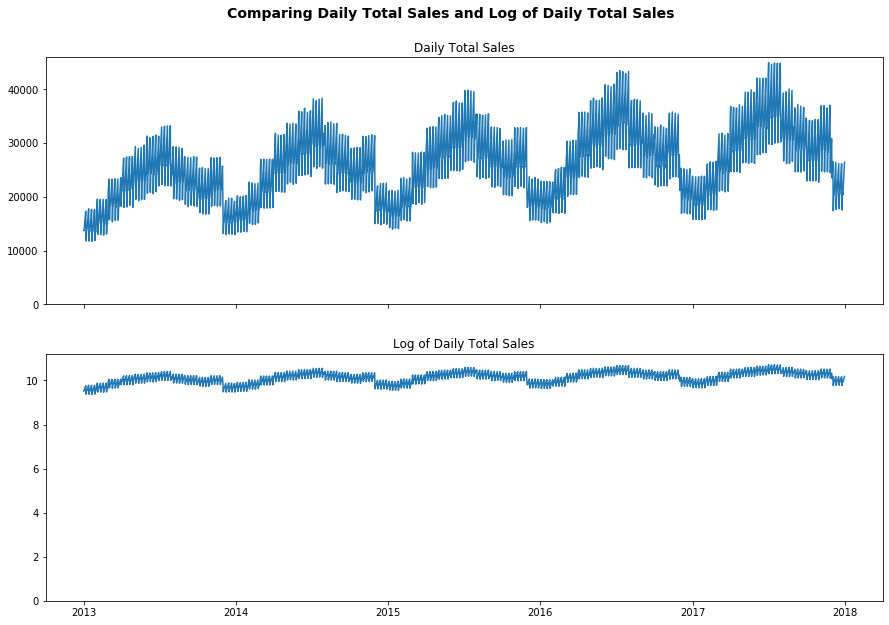

In [48]:
fig, ax = plt.subplots(nrows = 2, figsize = (15, 10), sharex = True)
plt.suptitle('Comparing Daily Total Sales and Log of Daily Total Sales', 
             x = 0.5, y = 0.95, fontsize = 14, fontweight = 'bold')

ax[0].plot(dailysales_all)
ax[0].set_title('Daily Total Sales')
ax[0].set_ylim((0, dailysales_all.max() + 1000))
ax[1].plot(np.log(dailysales_all))
ax[1].set_title('Log of Daily Total Sales')
ax[1].set_ylim((0, np.log(dailysales_all).max() + 0.5))

plt.show()

<ol>
    <li>For the timeseries we see that the variation in the daily value has been dramatically dampened by the log transformation.
    <li>We now investigate the effect of differencing the series on removing the trend. Given that we see a week on week trend in the daily value, we difference the series over an interval of 7 days.
</ol>

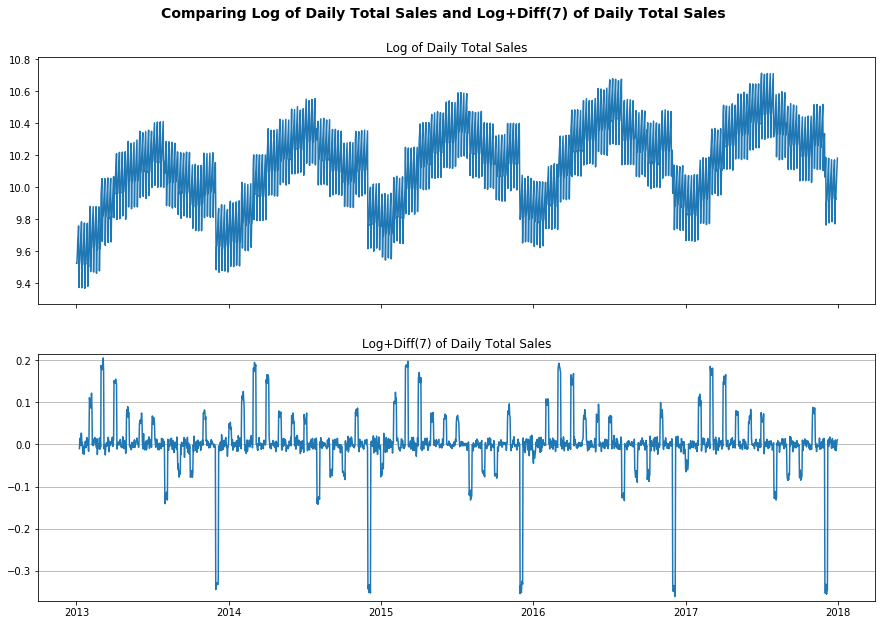

In [50]:
fig, ax = plt.subplots(nrows = 2, figsize = (15, 10), sharex = True)
plt.suptitle('Comparing Log of Daily Total Sales and Log+Diff(7) of Daily Total Sales',
             x = 0.5, y = 0.95, fontsize = 14, fontweight = 'bold')

ax[0].plot(np.log(dailysales_all))
ax[0].set_title('Log of Daily Total Sales')
ax[0].set_ylim((np.log(dailysales_all).min() - 0.1, np.log(dailysales_all).max() + 0.1))
ax[1].plot(np.log(dailysales_all).diff(7))
ax[1].set_title('Log+Diff(7) of Daily Total Sales')
ax[1].set_ylim((np.log(dailysales_all).diff(7).min() - 0.01, np.log(dailysales_all).diff(7).max() + 0.01))
plt.grid(b = True, axis = 'y')

plt.show()

<ol>
    <li>Differencing with lag 7 has removed the trend.
    <li>We will use the transformed series for further analysis.
    <li>We apply the augmented Dickey Fuller test to ascertain if the transformed series is stationary.
</ol>

In [76]:
dailysales_all_trans = np.log(dailysales_all).diff(7).dropna() # Elimnate NAs introduced by differencing

result = adfuller(dailysales_all_trans)
print("ADF test statistic: %0.4f" % result[0])
print("Critical Values for ADF test statistic")
print("Conf. Int.    Value")
for _, (key, value) in enumerate(result[4].items()):
    print("  %3s        %0.4f" % (key, value))
print("\np-value: %0.4e" % result[1])

ADF test statistic: -6.2921
Critical Values for ADF test statistic
Conf. Int.    Value
   1%        -3.4340
   5%        -2.8632
  10%        -2.5676

p-value: 3.5782e-08


From the results of the augmented Dickey Fuller test we can conclude, based both on the value of the ADF test statistic and the p-value, that the transformed series is indeed stationary.

### Investigating Existence of Autocorrelation

We use the Ljung-Box Test to ascertain if there indeed exists autocorrelation amongst the terms of the transformerd series.

In [90]:
result = acorr_ljungbox(dailysales_all_trans, lags = 10, return_df = True)
print('The p-value for the Ljung-Box test statistic for the first 10 lags:')
print(result.lb_pvalue.head(10))

The p-value for the Ljung-Box test statistic for the first 10 lags:
1     1.077758e-281
2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
5      0.000000e+00
6      0.000000e+00
7      0.000000e+00
8      0.000000e+00
9      0.000000e+00
10     0.000000e+00
Name: lb_pvalue, dtype: float64


### Investigating the ACF and PACF

We use the ACF and the PACF plots to make We plot the ACF and PACF functions for twice

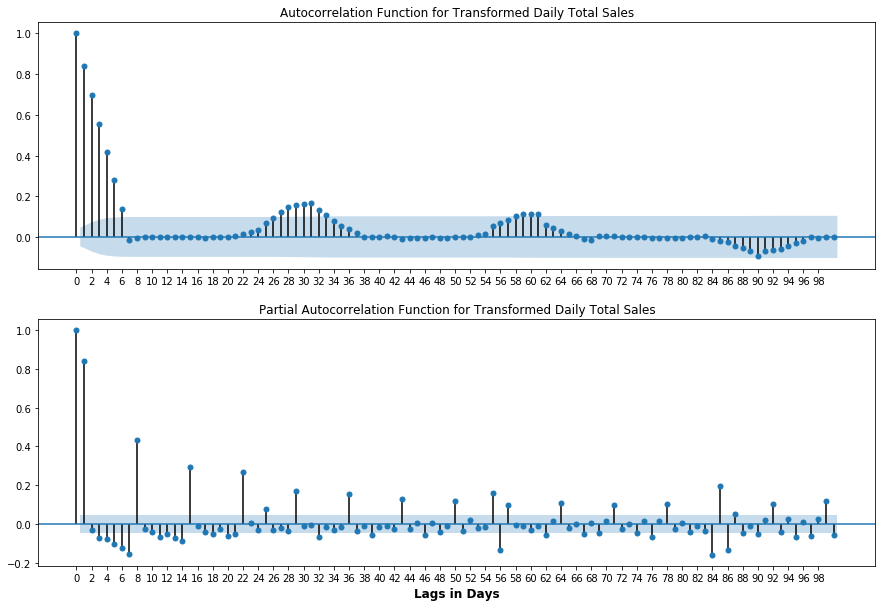

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (15, 10))

tsaplots.plot_acf(dailysales_all_log_diff, ax = ax1, alpha = 0.05, lags = 100, 
                  title = 'Autocorrelation Function for Transformed Daily Total Sales')
tsaplots.plot_pacf(dailysales_all_log_diff, ax = ax2, alpha = 0.05, lags = 100,
                   title = 'Partial Autocorrelation Function for Transformed Daily Total Sales')

ax1.set_xticks(np.arange(0, 100, 2))
ax2.set_xticks(np.arange(0, 100, 2))
ax2.set_xlabel('Lags in Days', fontsize = '12', fontweight = 'bold')

plt.show()

#### Observations
<ol>
    <li>The ACF chart indicates that for the transformed series, the autocorrelation function is significant for the first 6 lags, suggesting a MA process with order in the interval [1, 6]. Moreover, additional significant function values are seen around 30, 60 and 90 suggesting a MA process seasonal order in the interval [28, 32].
    <li>The PACF chart indicates that for the transformed series, the partial autocorrelation function is significant for the first lag, suggesting an AR process with order 1. Moreover, additional significant function values are seen around 8, 15, 22,... suggesting an AR process seasonal order of 7.
</ol>

These insights will form the basis of subseqent work using the SARIMA models

In [67]:
# Explicitly setting the DatetimeIndex frequency
dailysales_all.index = pd.DatetimeIndex(dailysales_all.index.values, freq = 'D')


#daily_total_sales.index = pd.DatetimeIndex(daily_total_sales.index.values, 
                                           #freq=daily_total_sales.index.inferred_freq)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=1826, freq='D')

#### PACF and ACF

PACF - Significant positive spikes at 1 and 7 indicating q = 1, Q = 1 and s = 7.

ACF - Significant positive spikes 1 through 6 and then at 7 and then pattern repeats. So perhaps p = 1, P = 1

d = 1 and D = 1

Optimization terminated successfully.
         Current function value: 8.075239
         Iterations: 2
         Function evaluations: 112


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             sales   No. Observations:                 1826
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -14745.386
Date:                           Mon, 06 Apr 2020   AIC                          29500.772
Time:                                   15:37:05   BIC                          29528.299
Sample:                               01-01-2013   HQIC                         29510.928
                                    - 12-31-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3004      0.144      2.091      0.037       0.019       0.582
ma.L1         -0.4128      0.138     -3.001      0.003      -0.682      -0.143
ar.S.L7       -0.0333      0.022     -1.524      0.128      -0.076       0.010
ma.S.L7       -0.6190      0.021    -29.168      0.000      -0.661      -0.577
sigma2      6.445e+05   5191.745    124.133      0.000    6.34e+05    6.55e+05
===================================================================================
Ljung-Box (Q):                       54.11   Jarque-Bera (JB):             80679.79
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                            -1.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

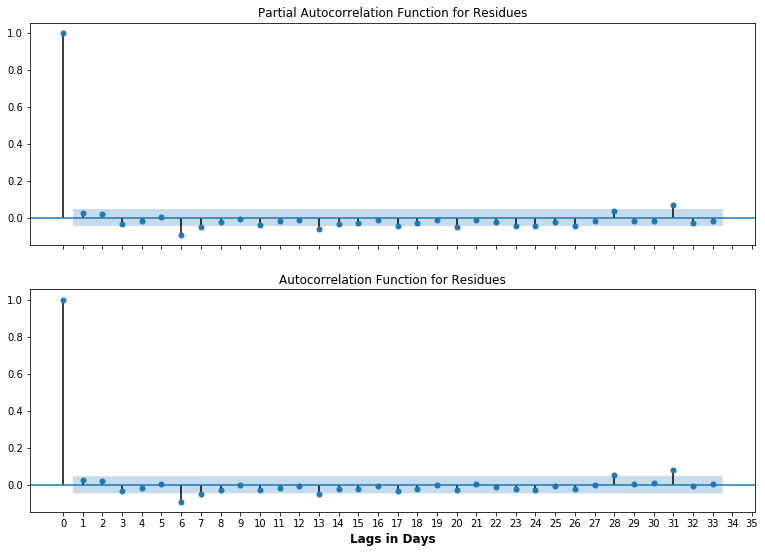

In [144]:
# Set the implied frequency of the timeseries to suppress a subsequent warning by SARIMAX()
dailysales_all.index = pd.DatetimeIndex(dailysales_all.index.values, 
                                           freq=dailysales_all.index.inferred_freq)

model = SARIMAX(dailysales_all, order = (1, 1, 1), seasonal_order = (1, 1, 1, 7), 
                trend = 'n').fit(method = 'powell')
res = model.resid

display(model.summary())

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (13, 9), sharex = True)

tsaplots.plot_pacf(res, ax = ax1, 
                   title = 'Partial Autocorrelation Function for Residues')

tsaplots.plot_acf(res, ax = ax2,
                  title = 'Autocorrelation Function for Residues')
ax2.set_xticks(np.arange(0, 36))
ax2.set_xlabel('Lags in Days', fontsize = '12', fontweight = 'bold')

plt.show()

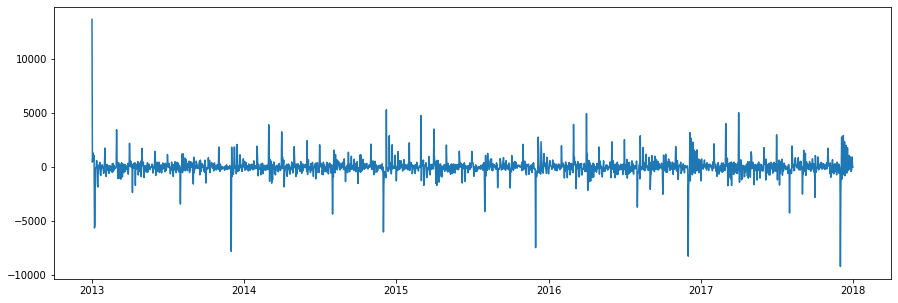

In [142]:
plt.figure(figsize = (15, 5))

plt.plot(res.index, res)

plt.show()

Optimization terminated successfully.
         Current function value: 8.082286
         Iterations: 1
         Function evaluations: 34


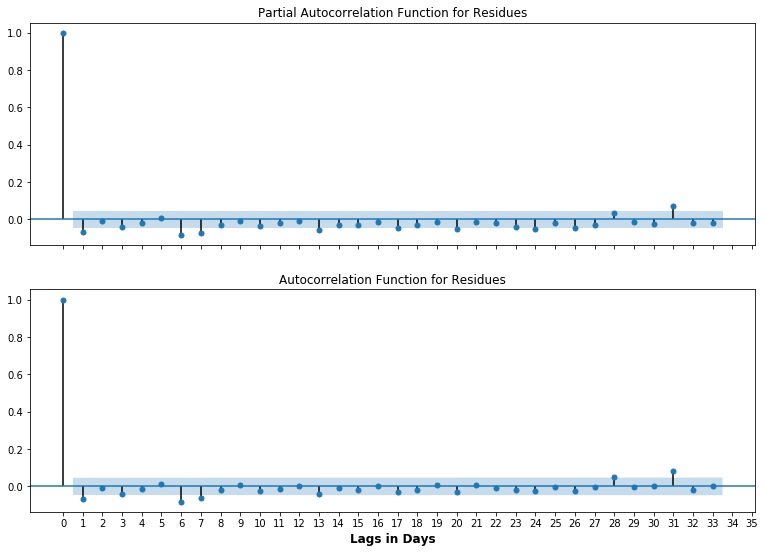

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               sales   No. Observations:                 1826
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 7)   Log Likelihood              -14758.253
Date:                             Mon, 06 Apr 2020   AIC                          29522.507
Time:                                     15:38:01   BIC                          29539.023
Sample:                                 01-01-2013   HQIC                         29528.601
                                      - 12-31-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.0060      0.023     -0.260      0.795      -0.051       0.039
ma.S.L7       -0.6234      0.022    -27.845      0.000      -0.667      -0.580
sigma2      6.543e+05   5325.770    122.849      0.000    6.44e+05    6.65e+05
===================================================================================
Ljung-Box (Q):                       68.15   Jarque-Bera (JB):             77034.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.70   Skew:                            -1.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [145]:
# Set the implied frequency of the timeseries to suppress a subsequent warning by SARIMAX()
dailysales_all.index = pd.DatetimeIndex(dailysales_all.index.values, 
                                           freq=dailysales_all.index.inferred_freq)

model = SARIMAX(dailysales_all, order = (0, 1, 0), seasonal_order = (1, 1, 1, 7), 
                trend = 'n').fit(method = 'powell')
res = model.resid

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (13, 9), sharex = True)

tsaplots.plot_pacf(res, ax = ax1, 
                   title = 'Partial Autocorrelation Function for Residues')

tsaplots.plot_acf(res, ax = ax2,
                  title = 'Autocorrelation Function for Residues')
ax2.set_xticks(np.arange(0, 36))
ax2.set_xlabel('Lags in Days', fontsize = '12', fontweight = 'bold')

plt.show()

display(model.summary())

In [ ]:
model.mle_retvals

#### Observations
<ul>
    <li>Log transforming and then differencing the Total Sales timeseries does make the resultant timeseries stationary. This is confirmed both visually via the resultant series timeplot and formulaiclly by applying the augmented Dickey Fuller Test and confirming that the ADF Statistic is less than the 1% value and the p-value is significantly smaller than 0.05.
</ul>

<i>Go forward we refer to the Log Transformed and Differenced Total Sales timeseries for the sake of brevity as Transformed Total Sales timeseries </i>

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (13, 9), sharex = True)

tsaplots.plot_pacf(tot_sls_trans, ax = ax1, 
                   title = 'Partial Autocorrelation Function for Transformed Total Sales')

tsaplots.plot_acf(tot_sls_trans, ax = ax2,
                  title = 'Autocorrelation Function for Transformed Total Sales')
ax2.set_xticks(np.arange(0, 36))
ax2.set_xlabel('Lags in Days', fontsize = '12', fontweight = 'bold')



plt.show()

#### Observations
<ul>
    <li>The PACF plot shows a distinctive pattern. The PACF has high positive value at 7, 14, 21 and 28 day lags, i.e. weekly. This points to a weekly seasonality in total sales. 
    <li>The ACF plot, which shows a recurring pattern for every additional 7 days of lag, further strengthens the hypothesis above and also indicates that within a week, the autocorrelation is significant (and negative) for days 1, 3, 4 and 6.
</ul>

### Visualising Quarterly Sales
For each of the 5 years of the timeseries, we visualise the quarterly Transformed Total Sales.

### Fit SARIMA Model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
train_len = np.int(0.9*len(tot_sls_trans))
train_tot_sls_trans = tot_sls_trans[:train_len]
test_tot_sls_trans = tot_sls_trans[train_len:]

In [ ]:
model = SARIMAX(train_tot_sls_trans, order = ([6], 0, 0), seasonal_order = (1, 0, 1, 7))
fit = model.fit()
score = model.score(train_tot_sls_trans)

In [ ]:
fit.summary()

In [ ]:
display(train_tot_sls_trans.head())
display(score[:5])

### Save Data

In [ ]:
tot_sls.to_pickle('./data/tot_sls.pkl')
tot_sls_trans.to_pickle('./data/tot_sls_trans.pkl')